In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from copy import copy
sns.set()

import os

directory = os.fsencode("data")

In [6]:
# make a list of lists with histogram information
peds_hists = []
cars_hists = []

if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("hist"):
            with open("data/" + filename, 'r') as histogram_file:
                lines = histogram_file.readlines()
                
                for line in lines:
                    if line.startswith("# Next iteration"):
                        peds_hists.append(copy(peds))
                        cars_hists.append(copy(cars))
                        
                    if line.startswith("#"):
                        cars = []
                        peds = []
                    elif line.startswith("Pedestrian"):
                        info = line.split(",")
                        peds.append(int(info[2].strip()))
                    elif line.startswith("Car"):
                        info = line.split(",")
                        cars.append(int(info[2].strip()))

In [7]:
for pedes_times in peds_hists:
    plt.figure(figsize=(5,2))
    plt.xlabel("Time")
    plt.ylabel("Frequention")
    plt.hist(pedes_times, bins = 50)
    plt.show()

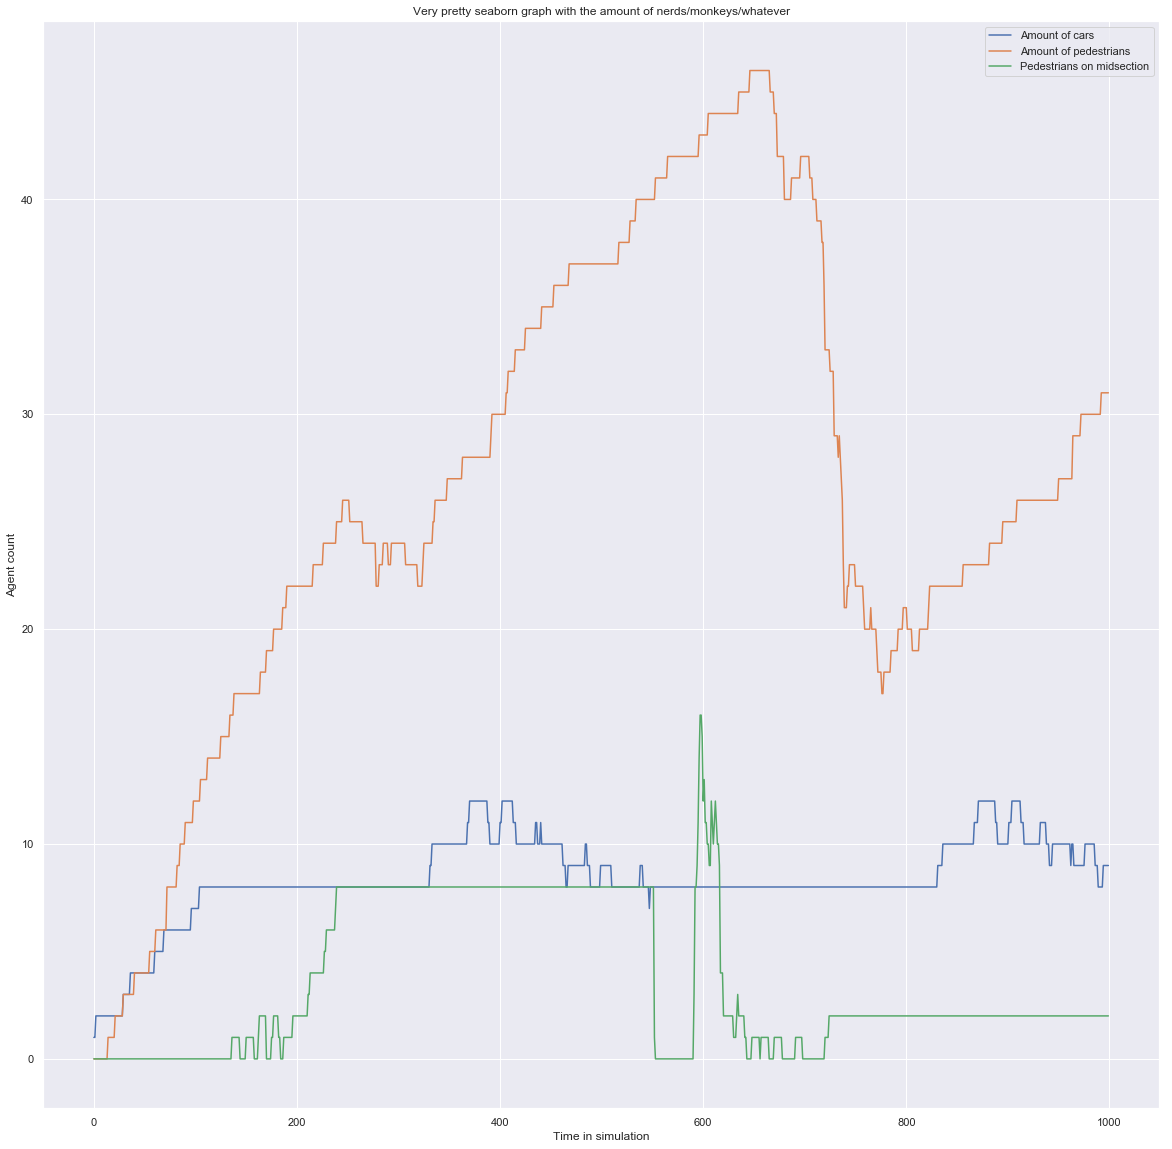

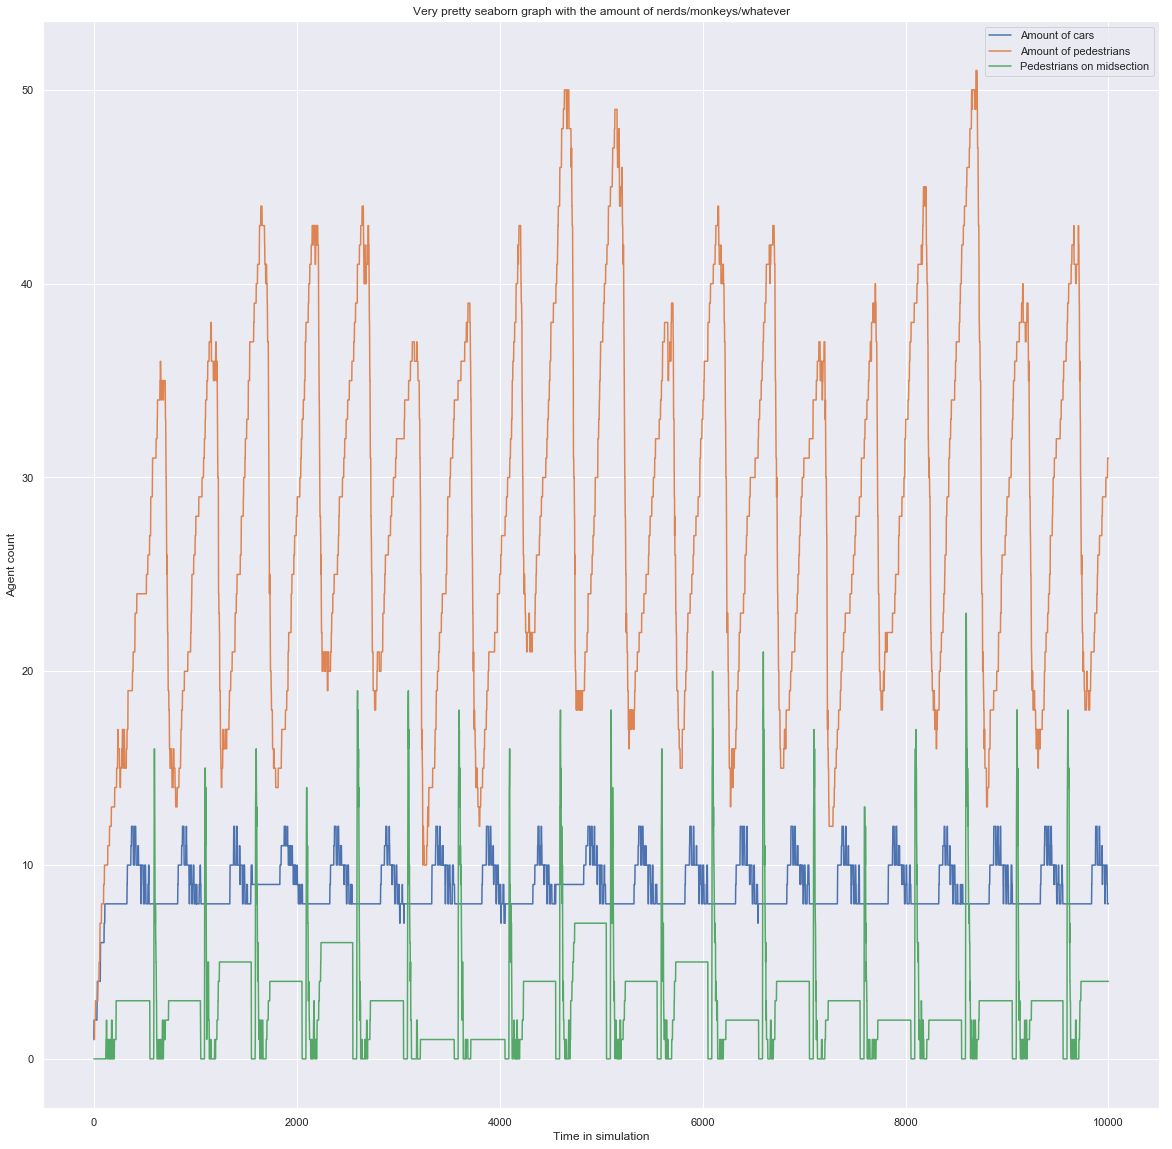

KeyError: 'iteration'

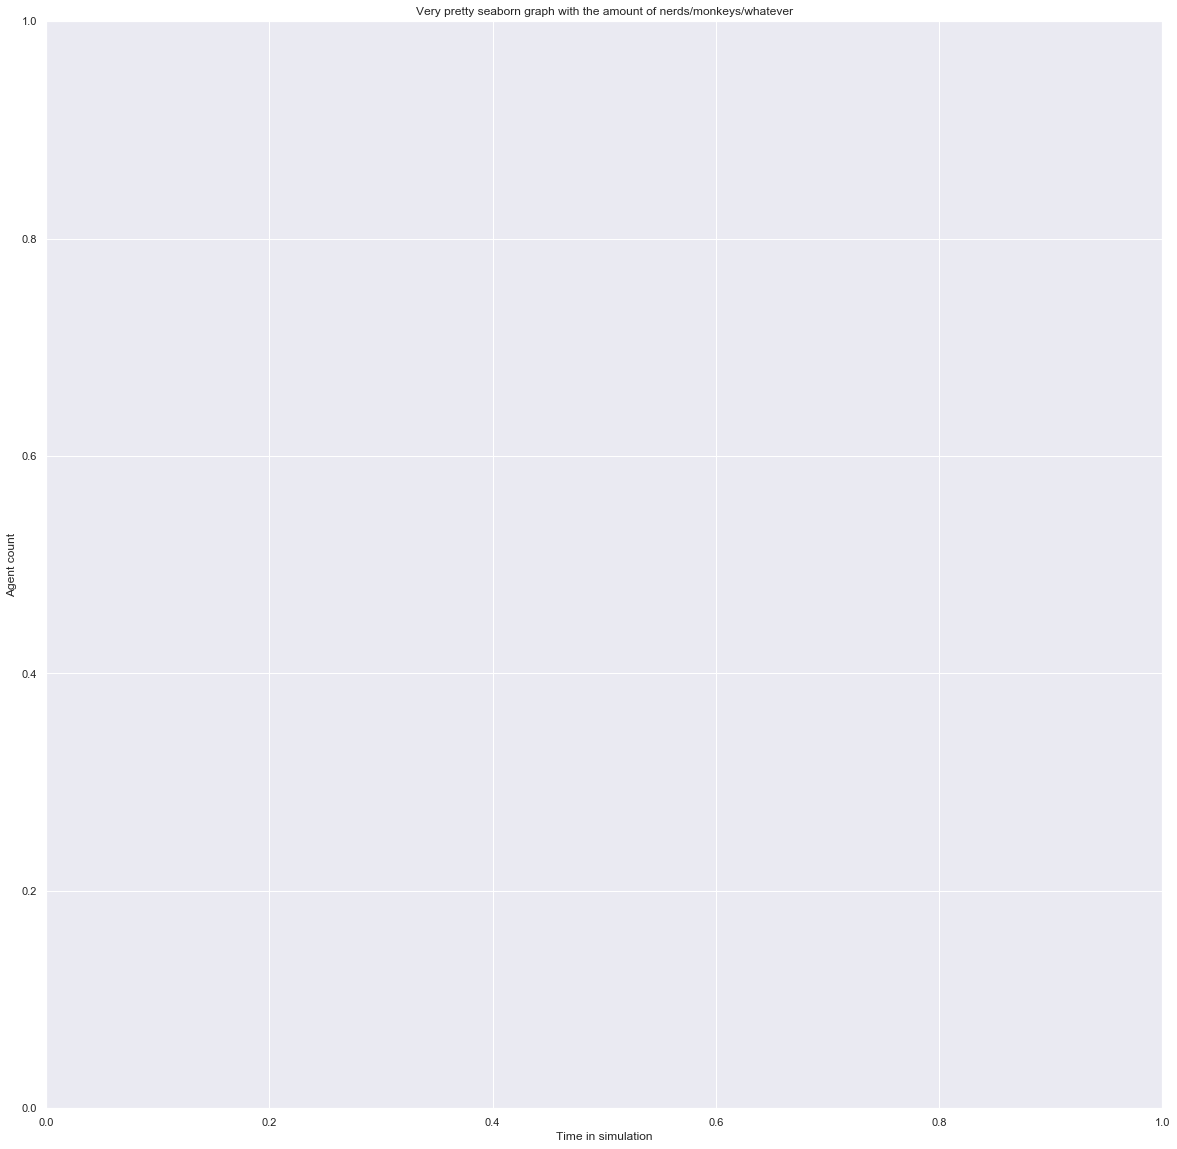

In [9]:
if directory:

    for file in os.listdir(directory):
        filename = os.fsdecode(file)

        if filename.startswith("info"):
                        
            df = pd.read_csv("data/" + filename, header=3)
            plt.figure(figsize=(20,20))
            plt.title("Very pretty seaborn graph with the amount of nerds/monkeys/whatever")
            plt.ylabel("Agent count")
            plt.xlabel("Time in simulation")

            df_sim = df[df['iteration'] == 0]

            plt.plot(range(len(df_sim['car_count'])), df_sim['car_count'], label="Amount of cars")
            plt.plot(range(len(df_sim['car_count'])), df_sim['pedestrian_count'], label="Amount of pedestrians")
            plt.plot(range(len(df_sim['car_count'])), df_sim['mid_section_count'], label="Pedestrians on midsection")
            plt.legend()
            plt.show()
            
            


In [9]:
# ratio of unobserved data/total data
def createBatchData(ratio, amount, data):
    period = int(len(data) / amount)
#     print(period)
    intervalSize = int((ratio) * period)
#     print(period, intervalSize)
    dataBatchArray = []
    currentIndex = 0
    
    # Benedict, is that you?
    currentBatch = []

    for sample in data:

        if currentIndex >= intervalSize and currentIndex < period:
#             print(sample)
            currentBatch.append(sample)
            currentIndex = currentIndex + 1
            
            if currentIndex >= period:
                dataBatchArray.append((np.mean(currentBatch), np.std(currentBatch)))
                currentBatch = []
                currentIndex = 0
        else:
            currentIndex = currentIndex + 1
            

    return dataBatchArray

def accCheck(data, sample_size):
    
    means = []
    # calculate means for each batch -> then for each simulation
    for i in data:
        tempMeans = []
        for j in i:
            tempMeans.append(j[0])
        means.append(tempMeans)

    # total mean
    stds = np.std(means)
    means = np.mean(means)

    Za = 1.96
    # Get confidence bounds (mean +- z*S/sqrt(n))
    confidence = [means-Za*(stds/sample_size**.5), means+Za*(stds/sample_size**.5)]

    # Get accuracy (Z*sqrt(mean(1-mean)))/sqrt(n)
    accuracy = (Za*stds) / (sample_size **.5 * means)
    return accuracy, confidence 

In [44]:
batchMeans = createBatchData(0.3, 30, carsTimes)

# we need to do more than 1 simulation right?
accCheck(batchMeans, 750)

IndexError: invalid index to scalar variable.

In [ ]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [2]:
import random
max([random.gauss(.134, .0342**2) for i in range(10000000)])

0.14000138983739113

In [22]:
print(max([random.gauss(.5, .3) for i in range(1000000)]))
print(min([random.gauss(.5, .3) for i in range(1000000)]))

1.9617189887946107
-0.9815459785626419


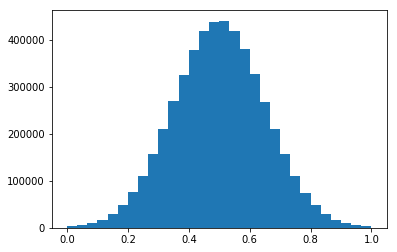

In [52]:
import matplotlib.pyplot as plt
plt.hist([max(0, min(1, random.gauss(0.5, 0.15))) for i in range(5000000)], bins = 30)
plt.show()

In [57]:
import numpy as np
import math
1 / (1 + np.exp(10 - 0.25 * math.inf))

1.0

In [21]:
neighbours = []
direction = 1
for i in range(16):
            neighbours.append(20 + ((-direction * 8) + i * (2.5 * 2)) * direction)
print(neighbours)

[12.0, 17.0, 22.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 82.0, 87.0]


In [25]:
neighbours = []
direction = -1
for i in range(16):
            neighbours.append(4 + ((-direction * 8) + i * (2.5 * 2)))
print(neighbours)

[12.0, 17.0, 22.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 82.0, 87.0]


In [5]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(50 + center - i * 2.5 * 2)
print(neighbours)

[58.0, 53.0, 48.0, 43.0, 38.0, 33.0, 28.0, 23.0, 18.0, 13.0, 8.0, 3.0, -2.0, -7.0, -12.0, -17.0]


In [4]:
neighbours = []
center = 8
for i in range(16):
    neighbours.append(20 - center + i * 2.5 * 2)
print(neighbours)

[12.0, 17.0, 22.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 82.0, 87.0]
